# K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number *k* of clusters in a dataset.

A cluster referes to a collection of data points aggregated together because of certain similarities.

You'll define a target number *k*, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies *k* number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The "means" in the K-means refers to averaging of the data; that is, finding the centroid.

## How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the cenroids.

It halts creating and optimizing clusters when either:

* The centroids have stabilized -- there is no change in their values because the clustering has been successful.
* The defined number of iterations has been achieved.

##  K-means algorithm example problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

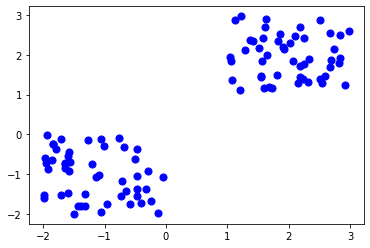

In [2]:
X = -2 * np.random.rand(100, 2)

X1 = 1 + 2 * np.random.rand(50, 2)

X[50:100, :] = X1

plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'b')
plt.show()

A total of 100 data points has been generated and divided into two groups, of 50 points each.

In [3]:
kmean = KMeans(n_clusters = 2)
kmean.fit(X)

KMeans(n_clusters=2)

In this case, we arbitrarily gave *k*(n_clusters) an arbitrary value of two.

In [4]:
# finding the center of the clusters

kmean.cluster_centers_

array([[-1.18319444, -1.01319104],
       [ 1.98693899,  1.95938585]])

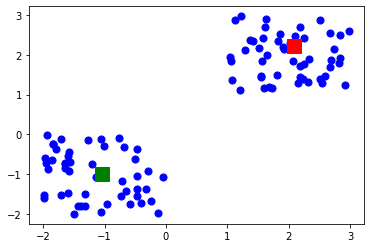

In [5]:
# display the cluster centroids

plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'b')
plt.scatter(-1.0348842, -0.98411307, s = 200, c = 'g', marker = 's')
plt.scatter(2.08742071, 2.21601966, s = 200, c = 'r', marker = 's')
plt.show()

In [6]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [7]:
sample_test = np.array([-3.0, -3.0])
second_test = sample_test.reshape(1, -1)
kmean.predict(second_test)

array([0], dtype=int32)

In [8]:
sample_test = np.array([3.0, 3.0])
third_test = sample_test.reshape(1, -1)
kmean.predict(third_test)

array([1], dtype=int32)

## Choosing the right number of clusters

Often times the data you'll be working with will have multiple dimensions making it difficult to visual. As a consequence, the optimum number of clusters is no longer obvious. Fortunately, we have a way of determining this mathematically.

We graph the ralationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).

In [9]:
from sklearn.datasets import make_blobs

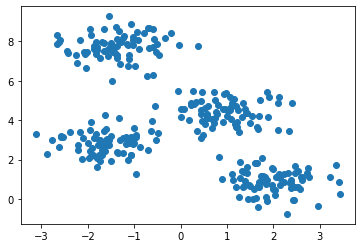

In [10]:
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

plt.scatter(X[:, 0], X[:, 1])

Even though we already know the optimal number of clusters, I figured we could still benefit from determining it using the *elbow mehod*. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property(WCSS) every time.

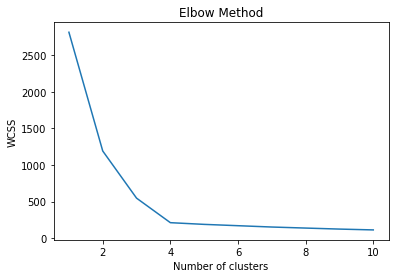

In [11]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


k-means++ ensures that you get don't fall into the random initialization trap.

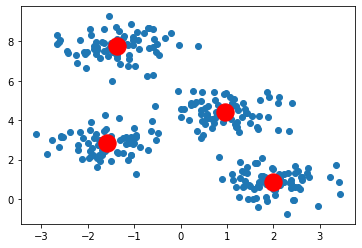

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')
plt.show()